## Preprocessing
- 데이터를 분석하기 전에 데이터 전처리 하는 방법을 학습

#### Index
1. 결측 데이터 검색
2. 결측 데이터 처리
3. 스케일링, 변환
4. 범주형 데이터의 처리
    - 범주형 -> 수치형

### 1. 결측 데이터의 검색
- missingno 패키지 사용
- missingno 패키지는 pandas의 데이터 프레임에서 결측 데이터를 찾는 기능을 제공
    - 결측(missing)데이터 : 누락된 데이터
- NaN(not a number), NaT(not a time)

#### 샘플 데이터 로드

In [1]:
df = pd.read_csv("datas/preprocessing.csv")
df

,x1,x2,x3,x4,x5
0,1.0,0.1,1.0,2019-01-01,A
1,2.0,NaN,NaN,2019-01-02,B
2,3.0,NaN,3.0,2019-01-03,C
3,NaN,0.4,4.0,2019-01-04,A
4,5.0,0.5,5.0,2019-01-05,B
5,NaN,NaN,NaN,2019-01-06,A
6,7.0,0.7,7.0,NaN,A


#### 결측 데이터의 검색 방법 1
- Pandas의 isnull(), isna() 함수를 사용
- 많은 데이터를 확인할때는 한계가 있음

In [2]:
df.isnull()

,x1,x2,x3,x4,x5
0,False,False,False,False,False
1,False,True,True,False,False
2,False,True,False,False,False
3,True,False,False,False,False
4,False,False,False,False,False
5,True,True,True,False,False
6,False,False,False,True,False


In [3]:
df.isna()

,x1,x2,x3,x4,x5
0,False,False,False,False,False
1,False,True,True,False,False
2,False,True,False,False,False
3,True,False,False,False,False
4,False,False,False,False,False
5,True,True,True,False,False
6,False,False,False,True,False


In [4]:
# sum() : 컬럼에서 True 값을 갯수를 출력
df.isna().sum()

x1    2
x2    3
x3    2
x4    1
x5    0
dtype: int64

#### 결측 데이터의 검색 방법 2
- Pandas의 info() 함수를 사용
- info() 함수를 사용하면 컬럼별 결측 데이터가 아닌 결측 데이터가 아닌 데이터의 갯수를 출력

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      5 non-null      float64
 1   x2      4 non-null      float64
 2   x3      5 non-null      float64
 3   x4      6 non-null      object 
 4   x5      7 non-null      object 
dtypes: float64(3), object(2)
memory usage: 408.0+ bytes


#### 결측 데이터 검색 방법 3
- missingno 패키지를 사용
- missingno 패키지 설치
    - `$ pip install missingno`
- missingno를 사용하면 결측치를 그래프로 확인

In [6]:
import missingno as msno

- matrix() 함수는 결측 데이터를 시각화 하는 함수
- 오른쪽에 스파크라인은 각 행의 결측 데이터를 확인
- 흰색으로 표신된 데이터는 결측 데이터

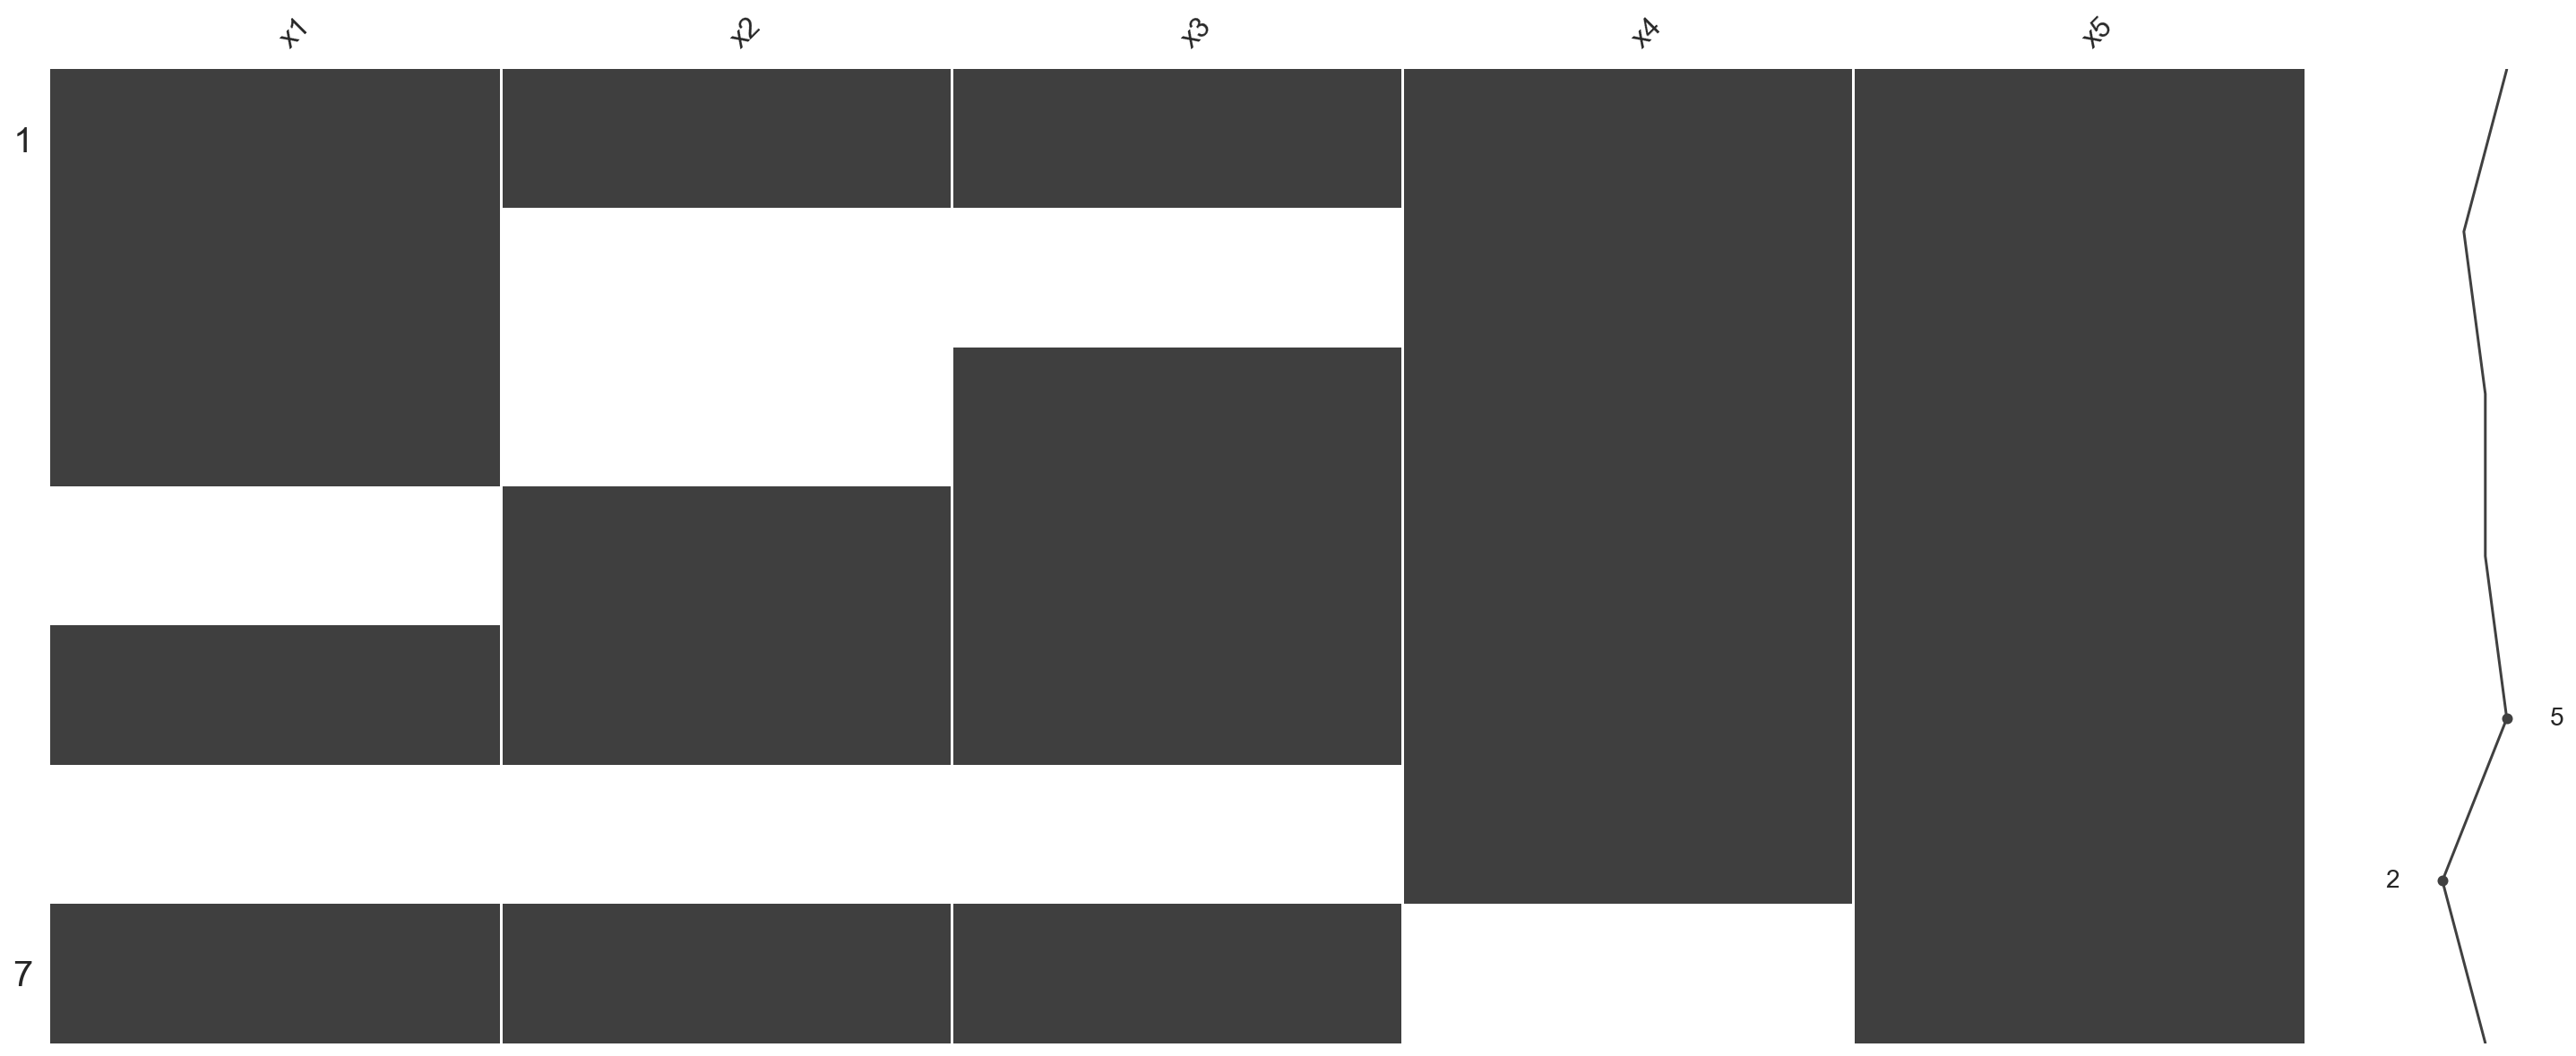

In [7]:
msno.matrix(df)
plt.show()

- bar() 함수는 컬럼별 결측 데이터가 얼마나 있는지 시각화하는 함수

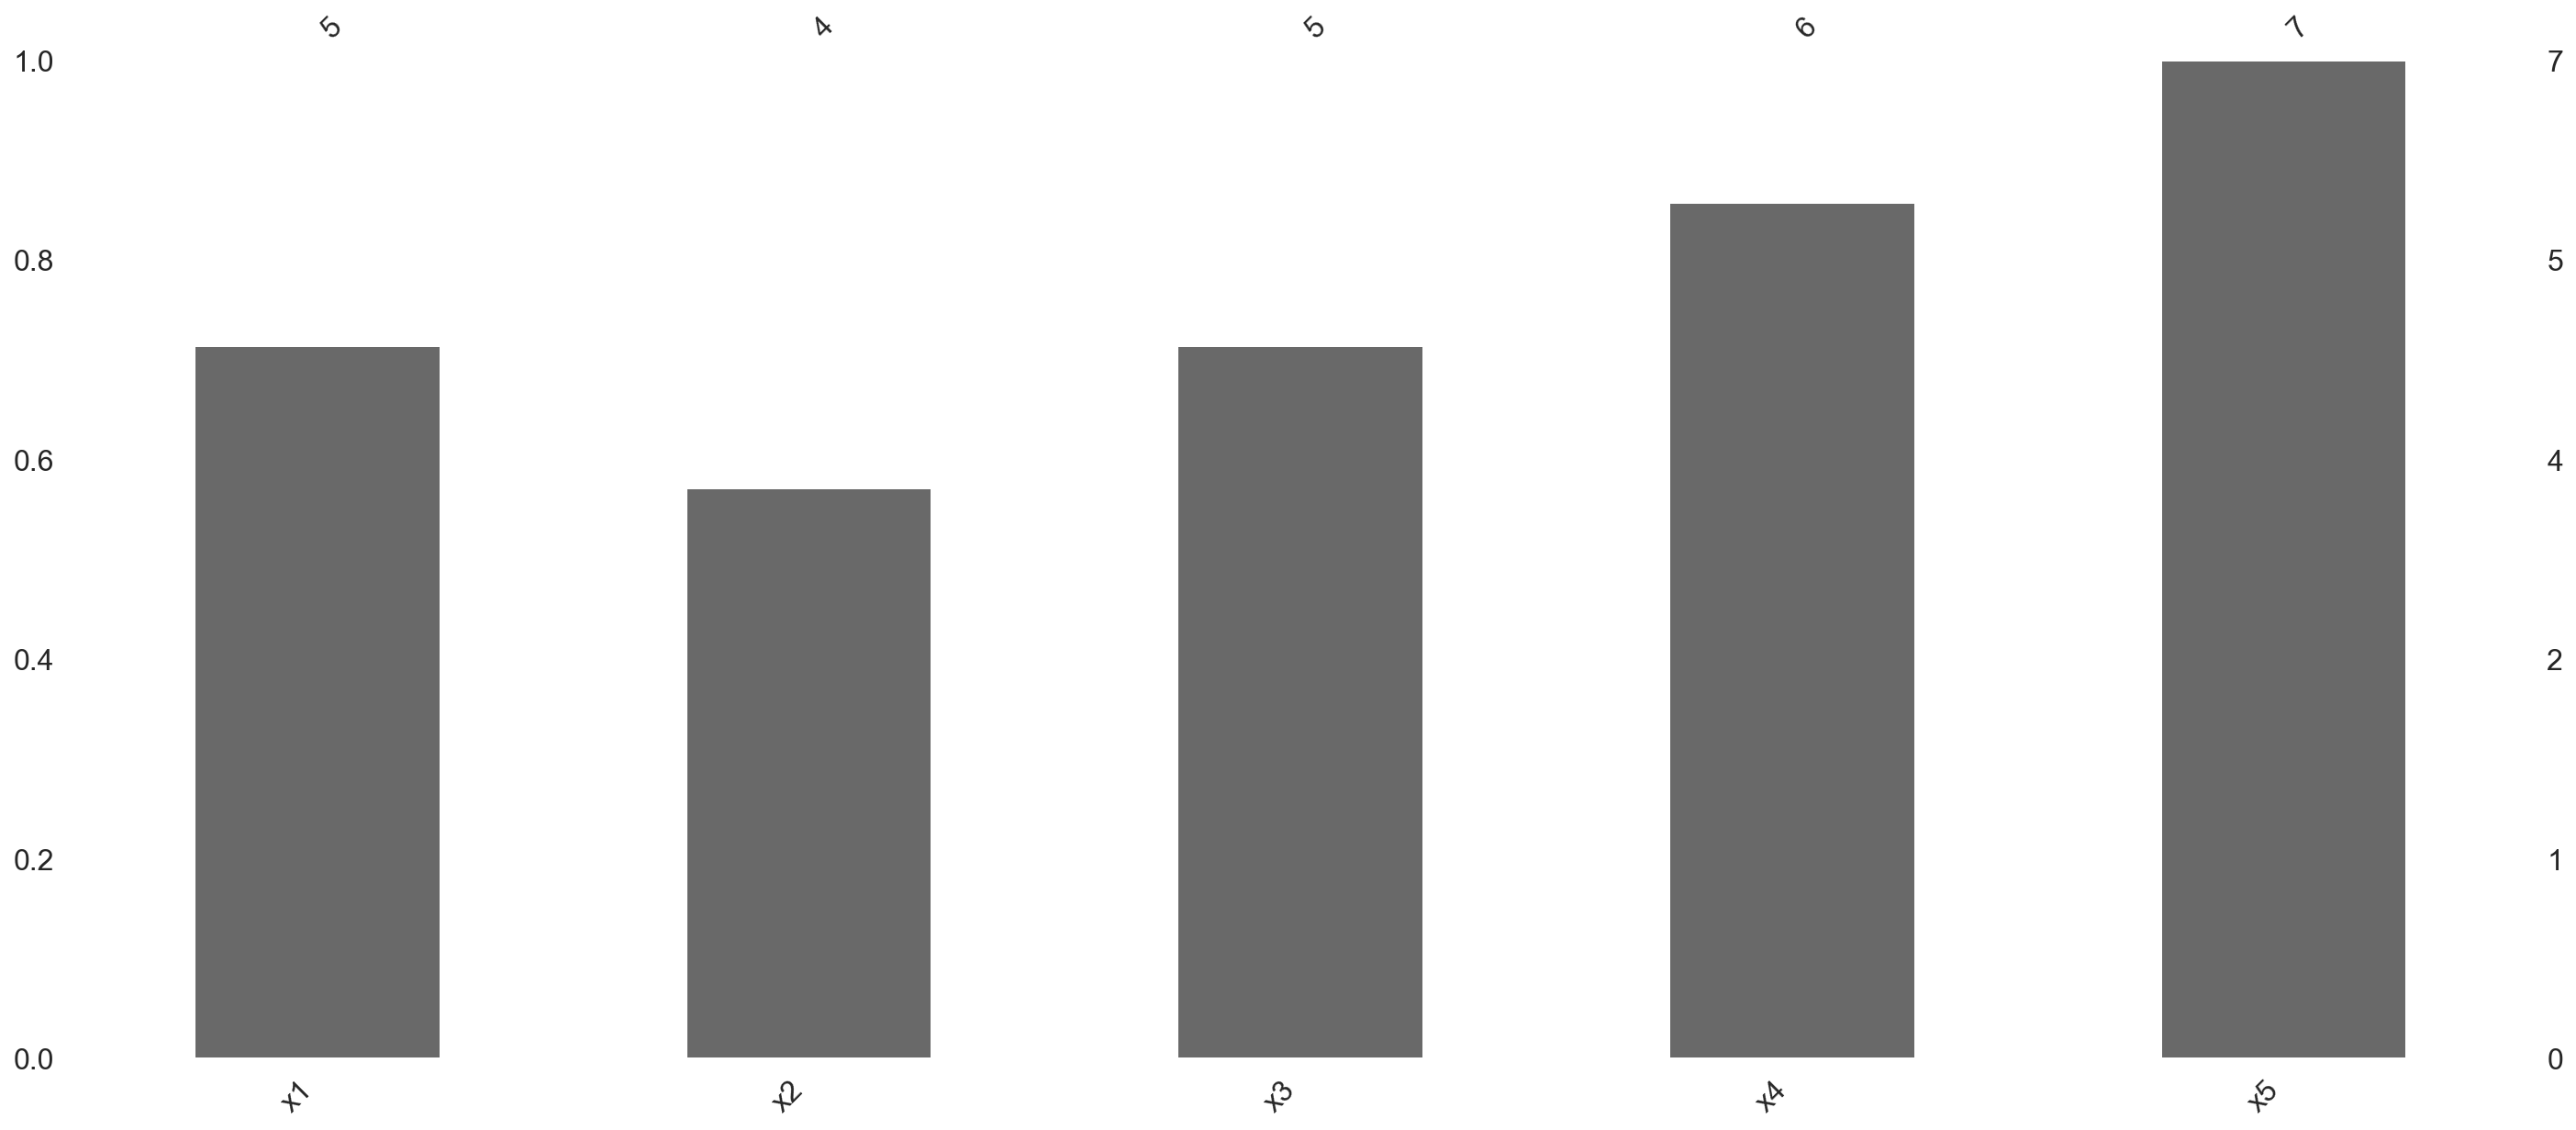

In [8]:
msno.bar(df)
plt.show()

#### 타이타닉 승객 데이터 결측치 전처리
* survived : 생존 여부
* pclass : 승객의 클래스
* sex : 성별. male, female로 표기
* sibsp : 형제 혹은 자매의 수
* parch : 부모 혹은 자녀의 수
* fare : 탑승 요금
* embarked : 출발지의 고유 이니셜
* class : 선실의 클래스
* who : male, female을 man, woman으로 표기
* adult_male : 성인 남성 인지 아닌지 여부
* deck : 선실 고유 번호의 가장 앞자리 알파벳(A ~ G)
* embark_town : 출발지
* alive : 생존 여부 데이터를 yes 혹은 no로 표기
* alone : 가족이 없는 경우 True

In [9]:
titanic_df = sns.load_dataset("titanic")
titanic_df.tail(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


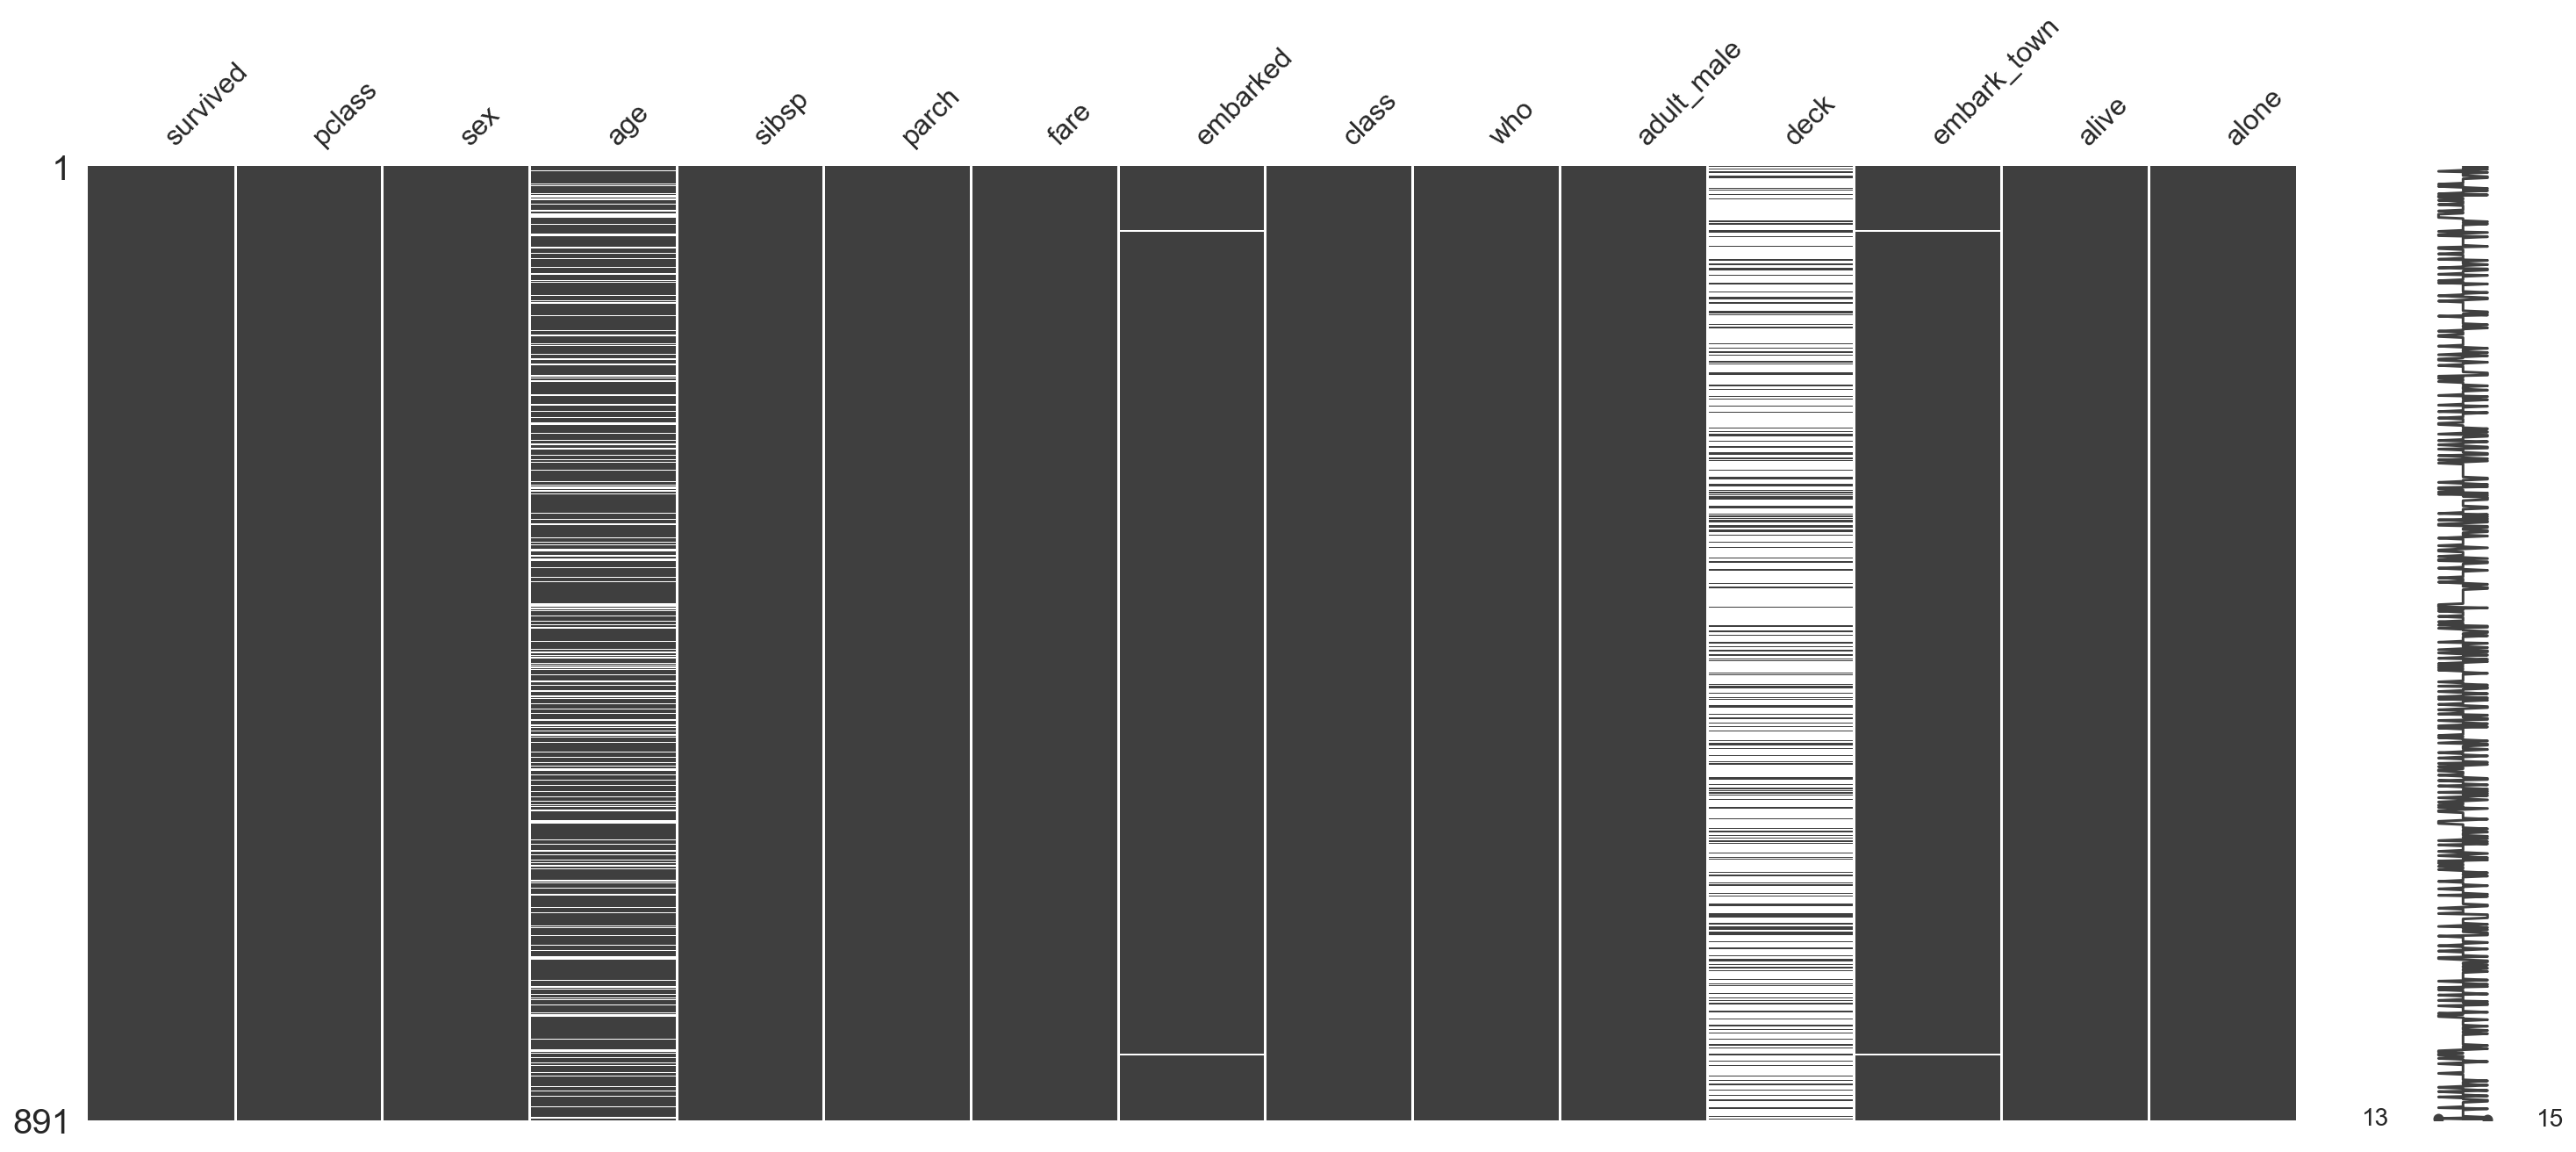

In [10]:
# 결측 데이터 시각화해서 확인
msno.matrix(titanic_df)
plt.show()

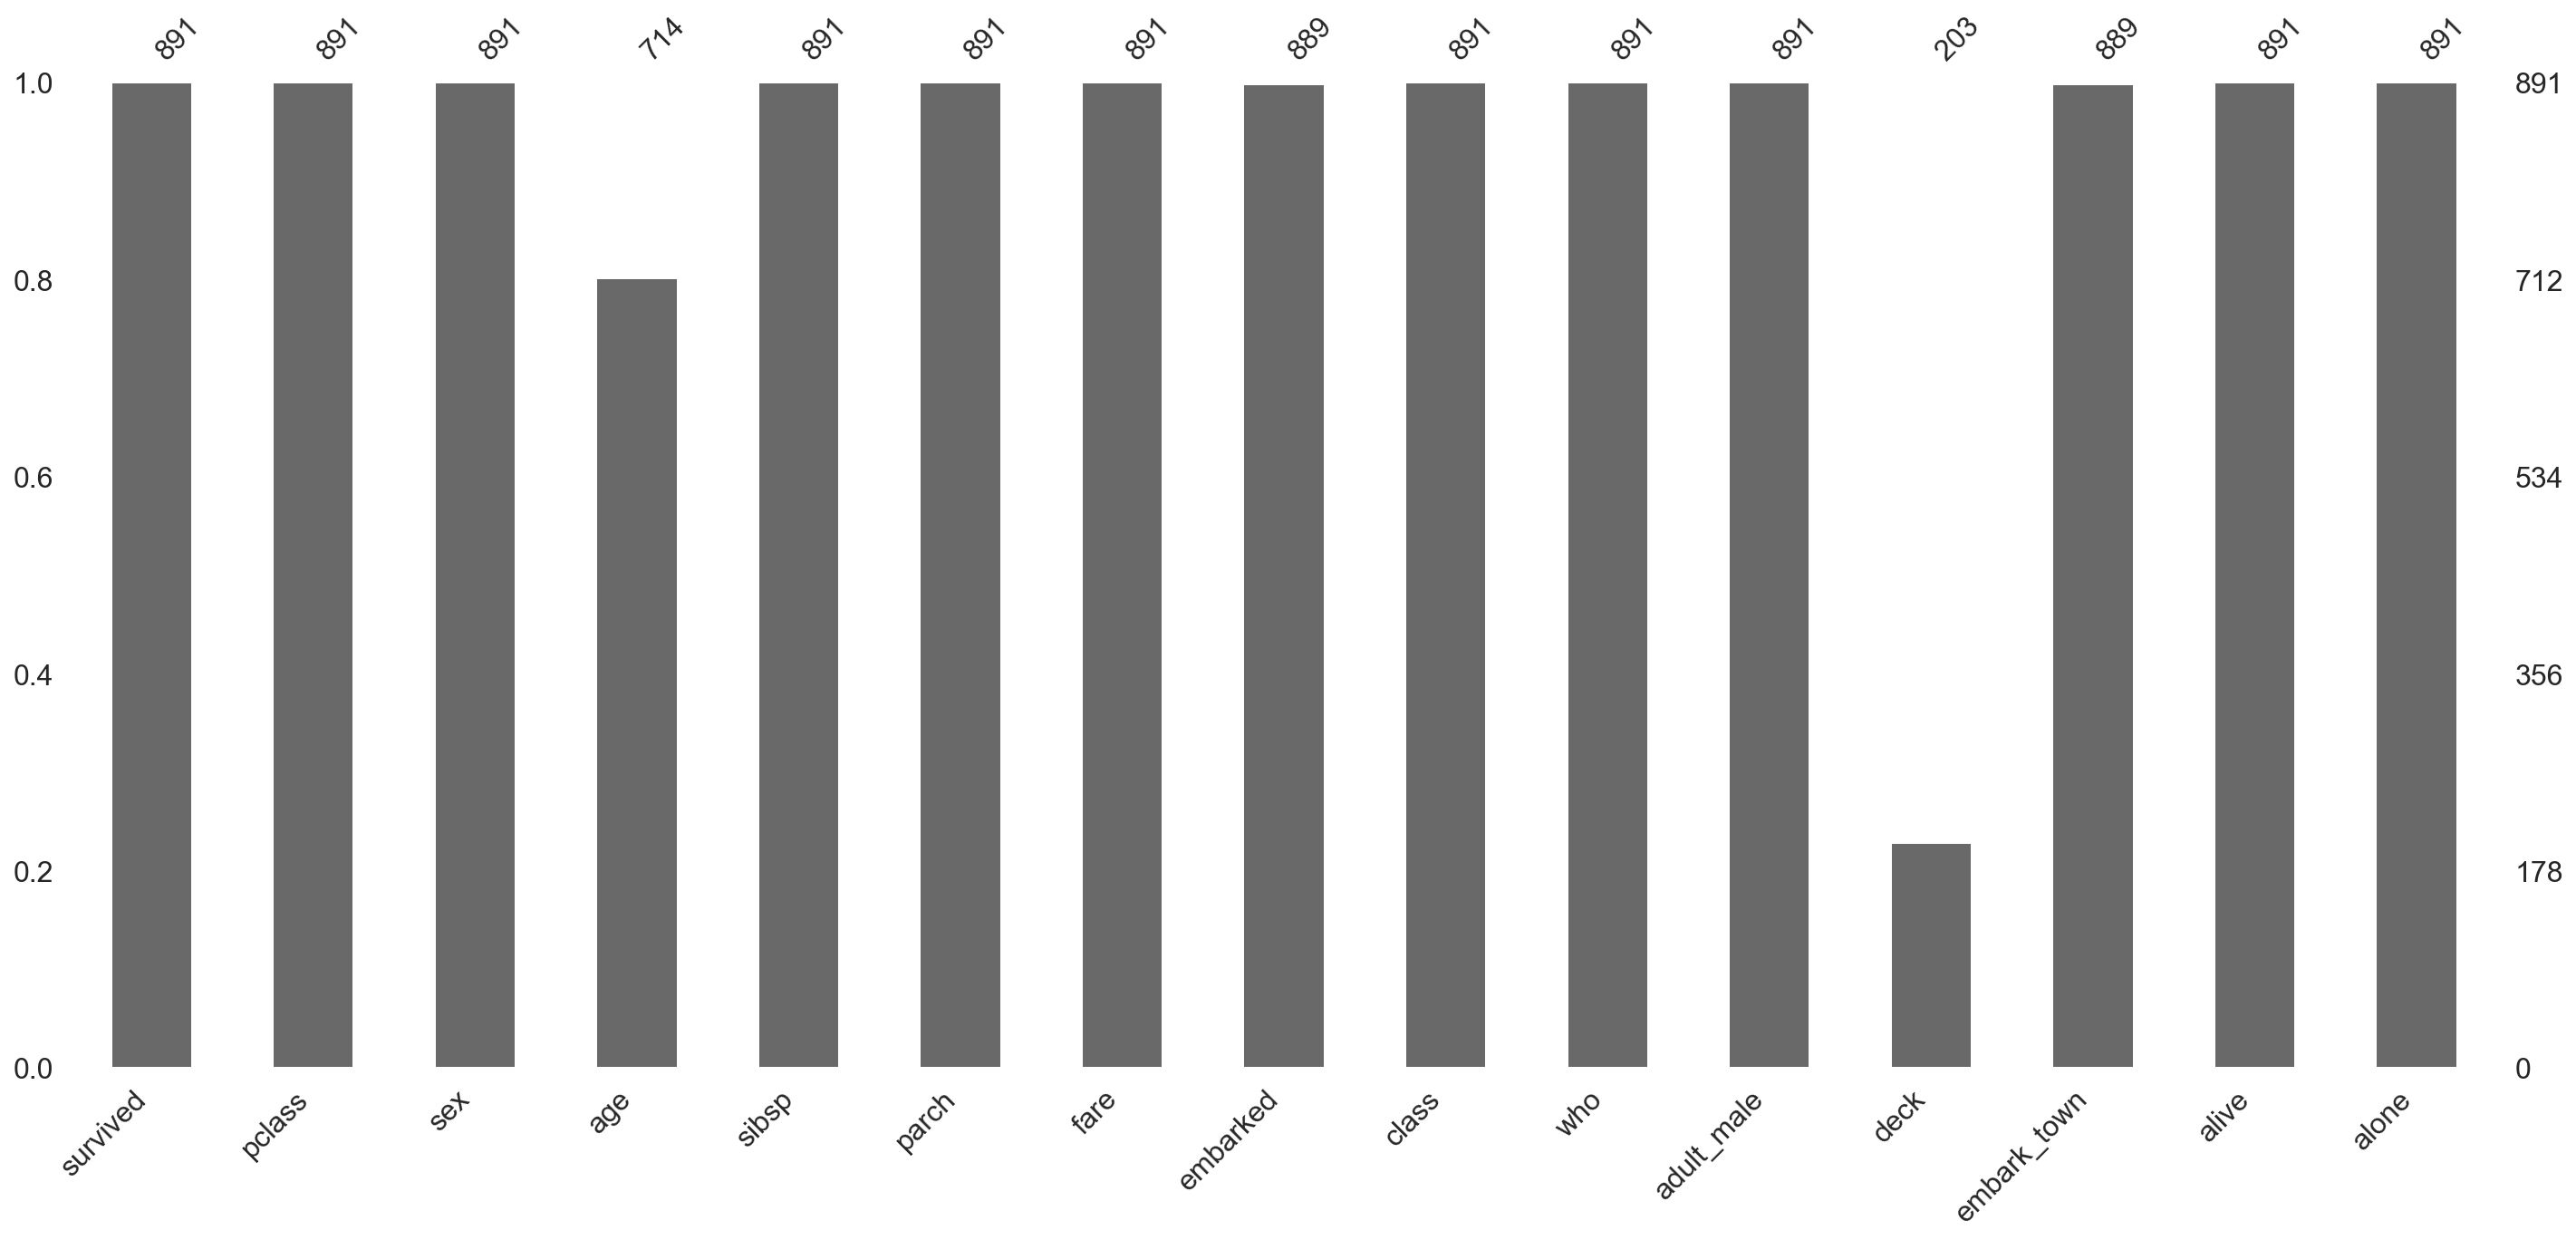

In [11]:
# 컬럼별 결측치 데이터 확인
msno.bar(titanic_df)
plt.show()

### 2. 결측 데이터의 처리
- 결측 데이터 삭제
    - 결측 데이터가 많은 경우 결측 데이터가 있는 행을 삭제
- 결측 데이터 대체
    - 결측 데이터가 적은 경우 평균값, 중앙값, 최빈값으로 데이터를 대체(imputation)

#### 결측 데이터 삭제
- dropna() : 결측 데이터가 있는 행이나 열을 삭제

In [12]:
# 결측 데이터가 있는 row 삭제
df.dropna()

,x1,x2,x3,x4,x5
0,1.0,0.1,1.0,2019-01-01,A
4,5.0,0.5,5.0,2019-01-05,B


In [13]:
# 결측 데이터가 있는 column 삭제
df.dropna(axis=1)

,x5
0,A
1,B
2,C
3,A
4,B
5,A
6,A


In [14]:
# thresh 인수를 사용하여 갯수를 지정해서 삭제
df.notnull().sum()

x1    5
x2    4
x3    5
x4    6
x5    7
dtype: int64

In [15]:
# 데이터가 5개 이상인 컬럼만 출력
df.dropna(thresh=5, axis=1)

,x1,x3,x4,x5
0,1.0,1.0,2019-01-01,A
1,2.0,NaN,2019-01-02,B
2,3.0,3.0,2019-01-03,C
3,NaN,4.0,2019-01-04,A
4,5.0,5.0,2019-01-05,B
5,NaN,NaN,2019-01-06,A
6,7.0,7.0,NaN,A


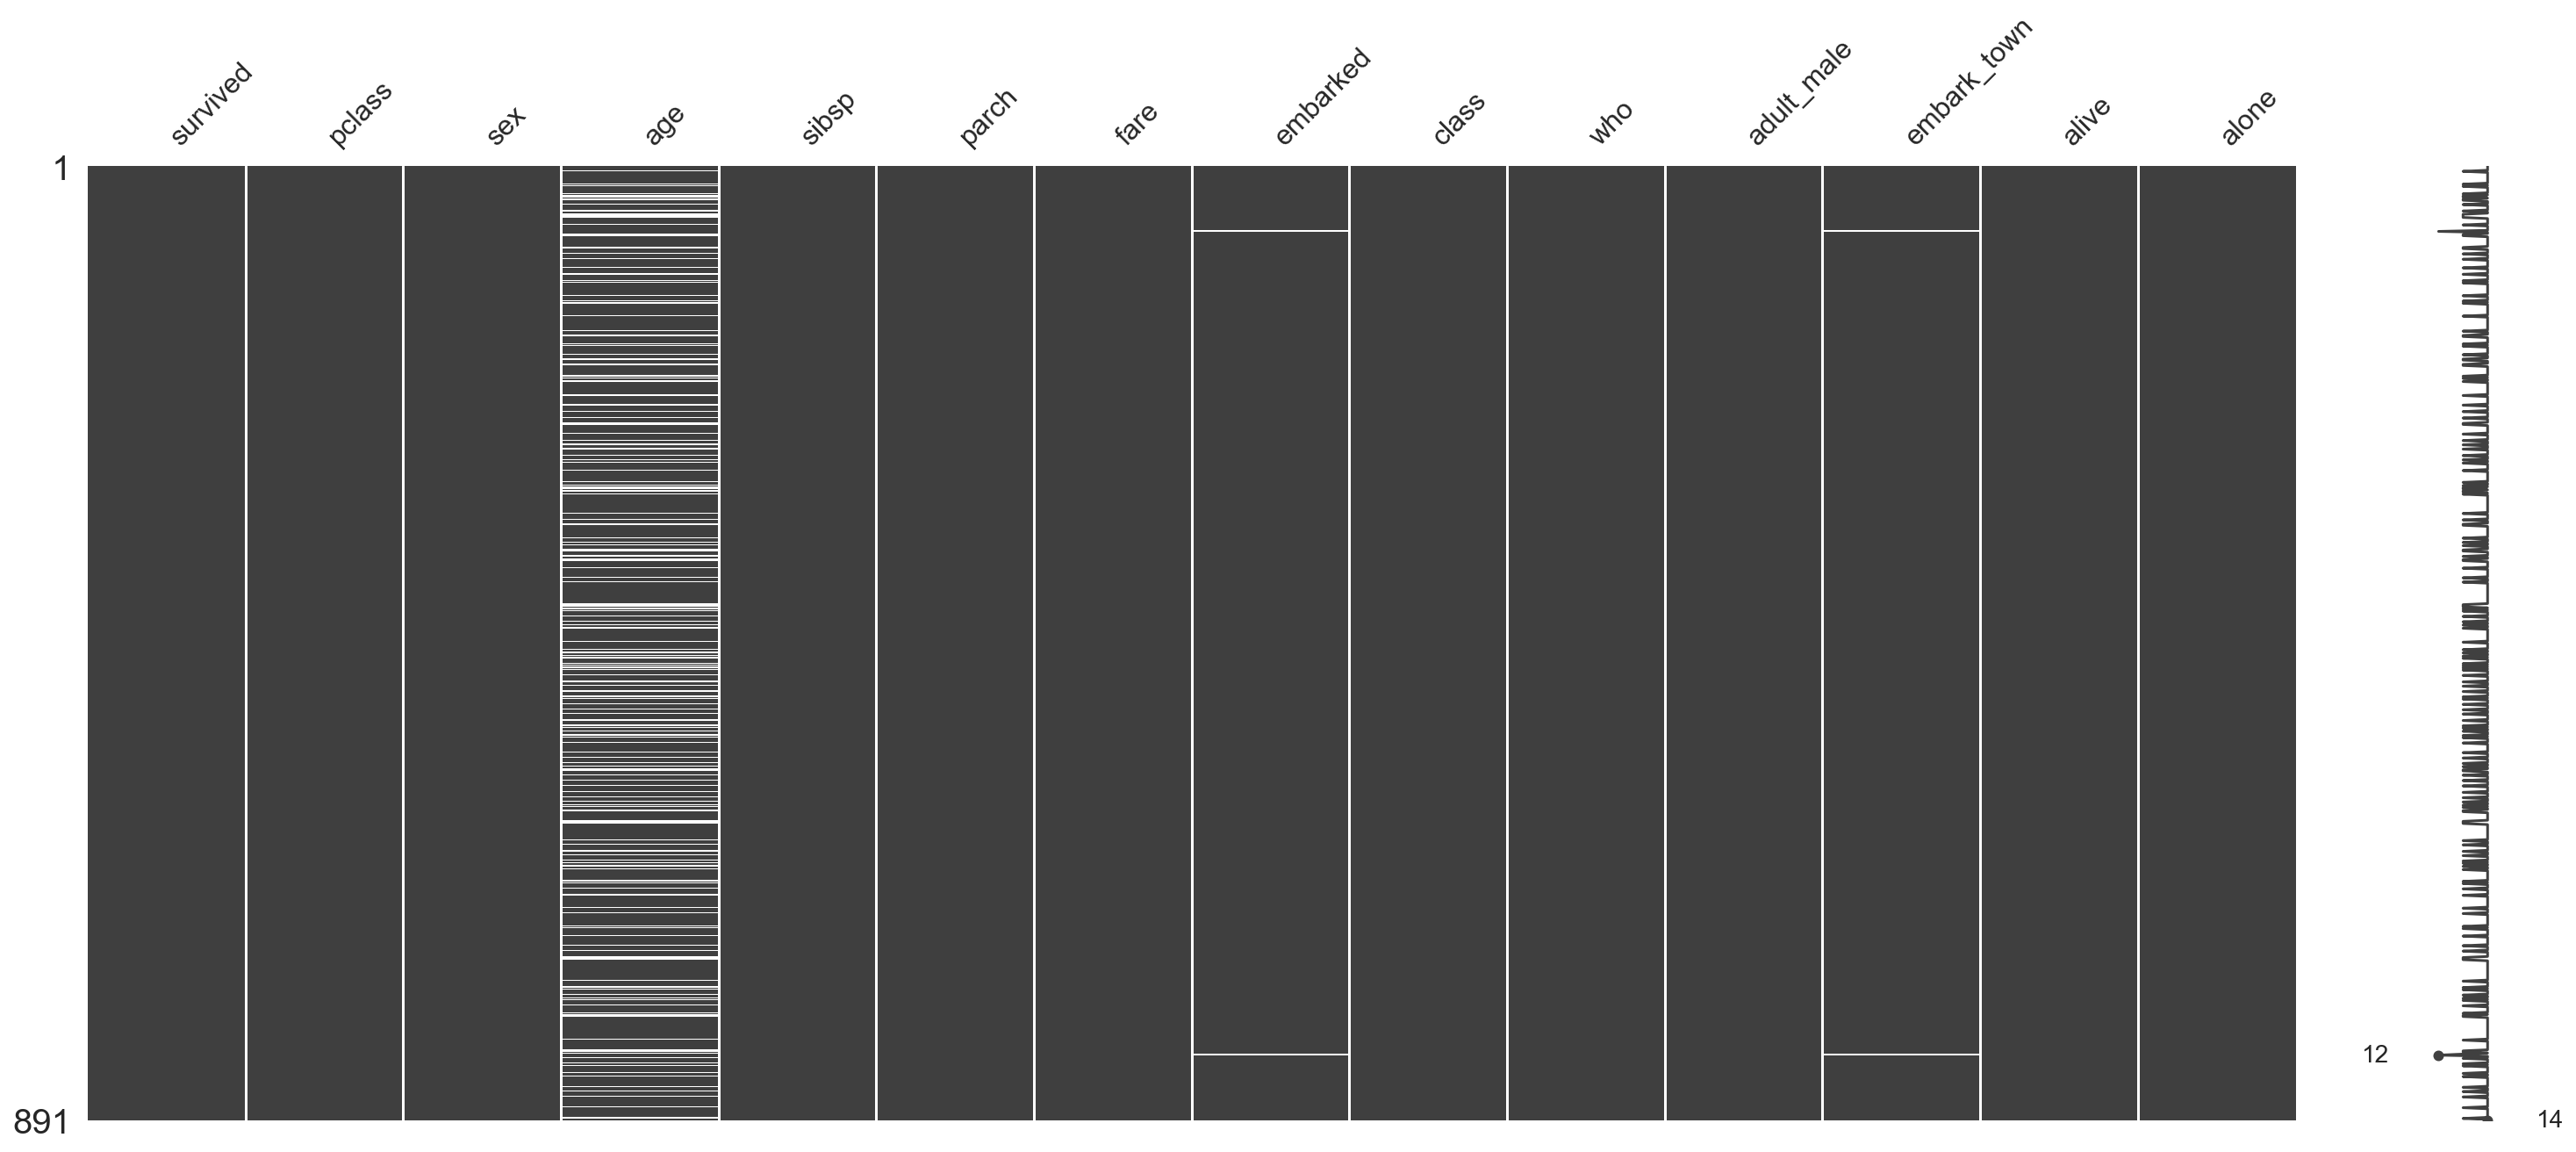

In [16]:
# 데이터가 20% 이상 없으면 컬럼 삭제 : deck 컬럼 삭제
titanic_df = titanic_df.dropna(thresh=int(len(titanic_df) * 0.8), axis=1)
msno.matrix(titanic_df)
plt.show()

#### 결측 데이터 대체
- 결측 데이터를 다른 데이터로 대체(imputation)
- sklearn.impute
- 비결측 데이터의 평균값이나 중앙값으로 대체
- sklearn.impute 의 SimpleImputer 사용
    - strategy 인수
        - mean : 평균값
        - median : 중앙값
        - most_frequent : 최빈값
    - 인수 선택 방법
        - 데이터가 실수 연속값인 경우에는 평균, 중앙값 사용
        - 데이터의 분포가 대칭이면 평균, 비대칭이면 중앙값 사용
        - 데이터가 범주이거나 정수인 경우에는 최빈값만 사용가능

In [17]:
df

,x1,x2,x3,x4,x5
0,1.0,0.1,1.0,2019-01-01,A
1,2.0,NaN,NaN,2019-01-02,B
2,3.0,NaN,3.0,2019-01-03,C
3,NaN,0.4,4.0,2019-01-04,A
4,5.0,0.5,5.0,2019-01-05,B
5,NaN,NaN,NaN,2019-01-06,A
6,7.0,0.7,7.0,NaN,A


In [18]:
from sklearn.impute import SimpleImputer

# 최빈값으로 전처리 : mean, median, most_frequent, constant(특정한 값으로 채움:fill_value 인자와 같이 사용)
imputer = SimpleImputer(strategy="most_frequent",)
pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

,x1,x2,x3,x4,x5
0,1,0.1,1,2019-01-01,A
1,2,0.1,1,2019-01-02,B
2,3,0.1,3,2019-01-03,C
3,1,0.4,4,2019-01-04,A
4,5,0.5,5,2019-01-05,B
5,1,0.1,1,2019-01-06,A
6,7,0.7,7,2019-01-01,A


In [19]:
titanic_df.tail(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
889,1,1,male,26.0,0,0,30.00,C,First,man,True,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,Queenstown,no,True


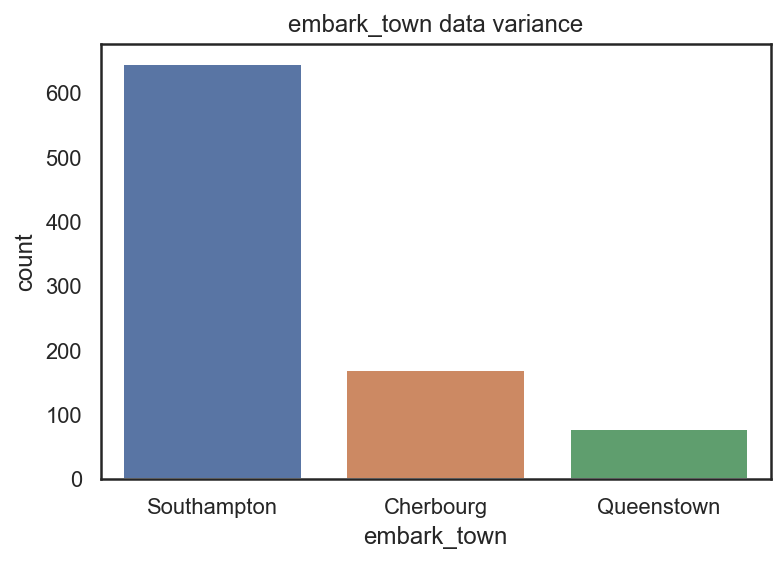

In [20]:
# 데이터 빈도 출력
sns.countplot(titanic_df.embark_town)
plt.title("embark_town data variance")
plt.show()

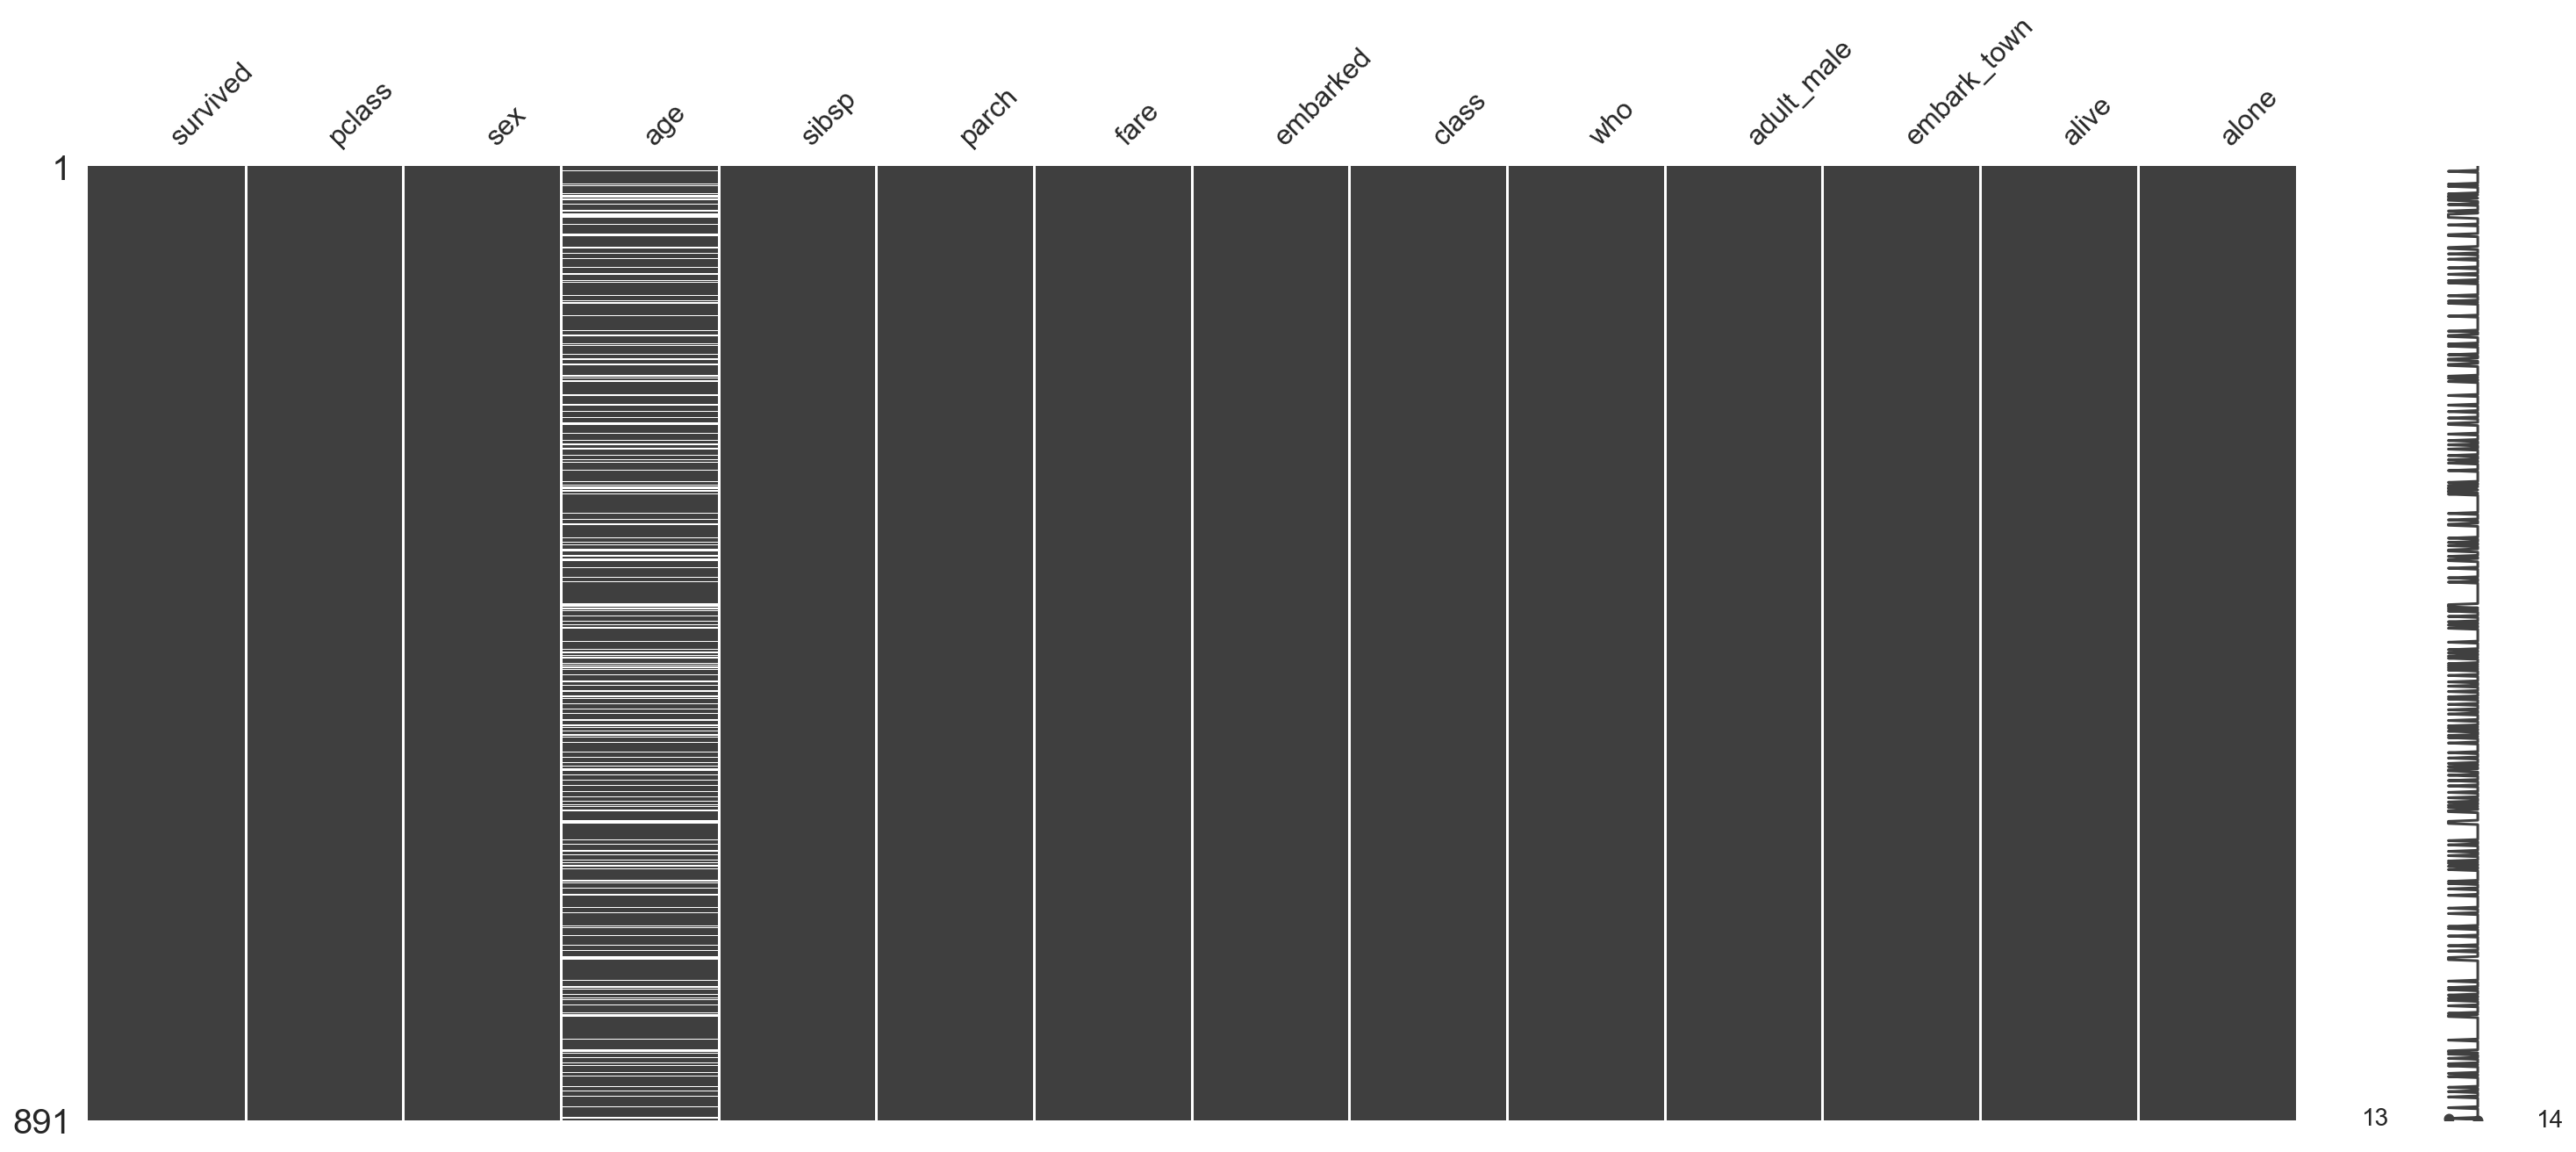

In [21]:
from sklearn.impute import SimpleImputer

# 범주형 데이터 embark_town,embarked를 최빈값(most_frequent)으로 채움
imputer_embark_town = SimpleImputer(strategy="most_frequent")
titanic_df["embark_town"] = imputer_embark_town.fit_transform(titanic_df[["embark_town"]])
titanic_df["embarked"] = imputer_embark_town.fit_transform(titanic_df[["embarked"]])

msno.matrix(titanic_df)
plt.show()

- age는 데이터가 대칭이 아니므로 평균(mean)보다 중앙값(meadian)값을 사용

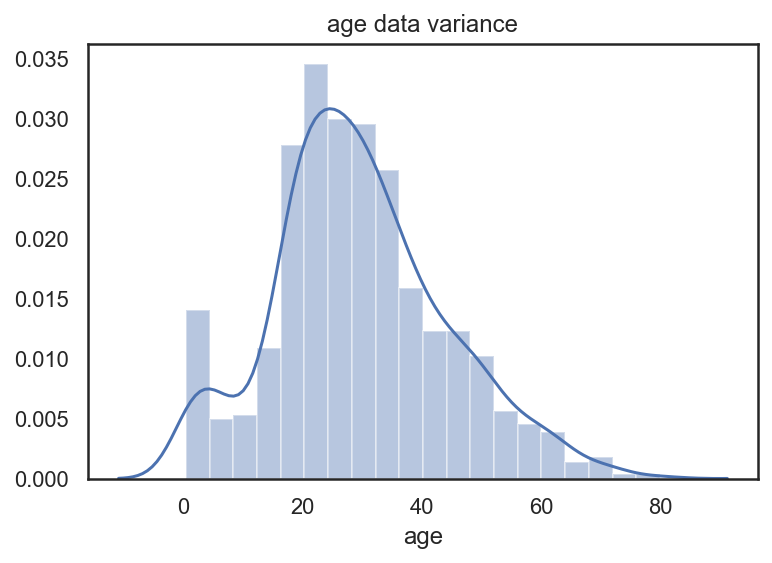

In [22]:
sns.distplot(titanic_df.age)
plt.title("age data variance")
plt.show()

In [23]:
# age의 결측치를 중앙값으로 채움
imputer_age = SimpleImputer(strategy="median")
titanic_df["age"] = imputer_embark_town.fit_transform(titanic_df[["age"]])

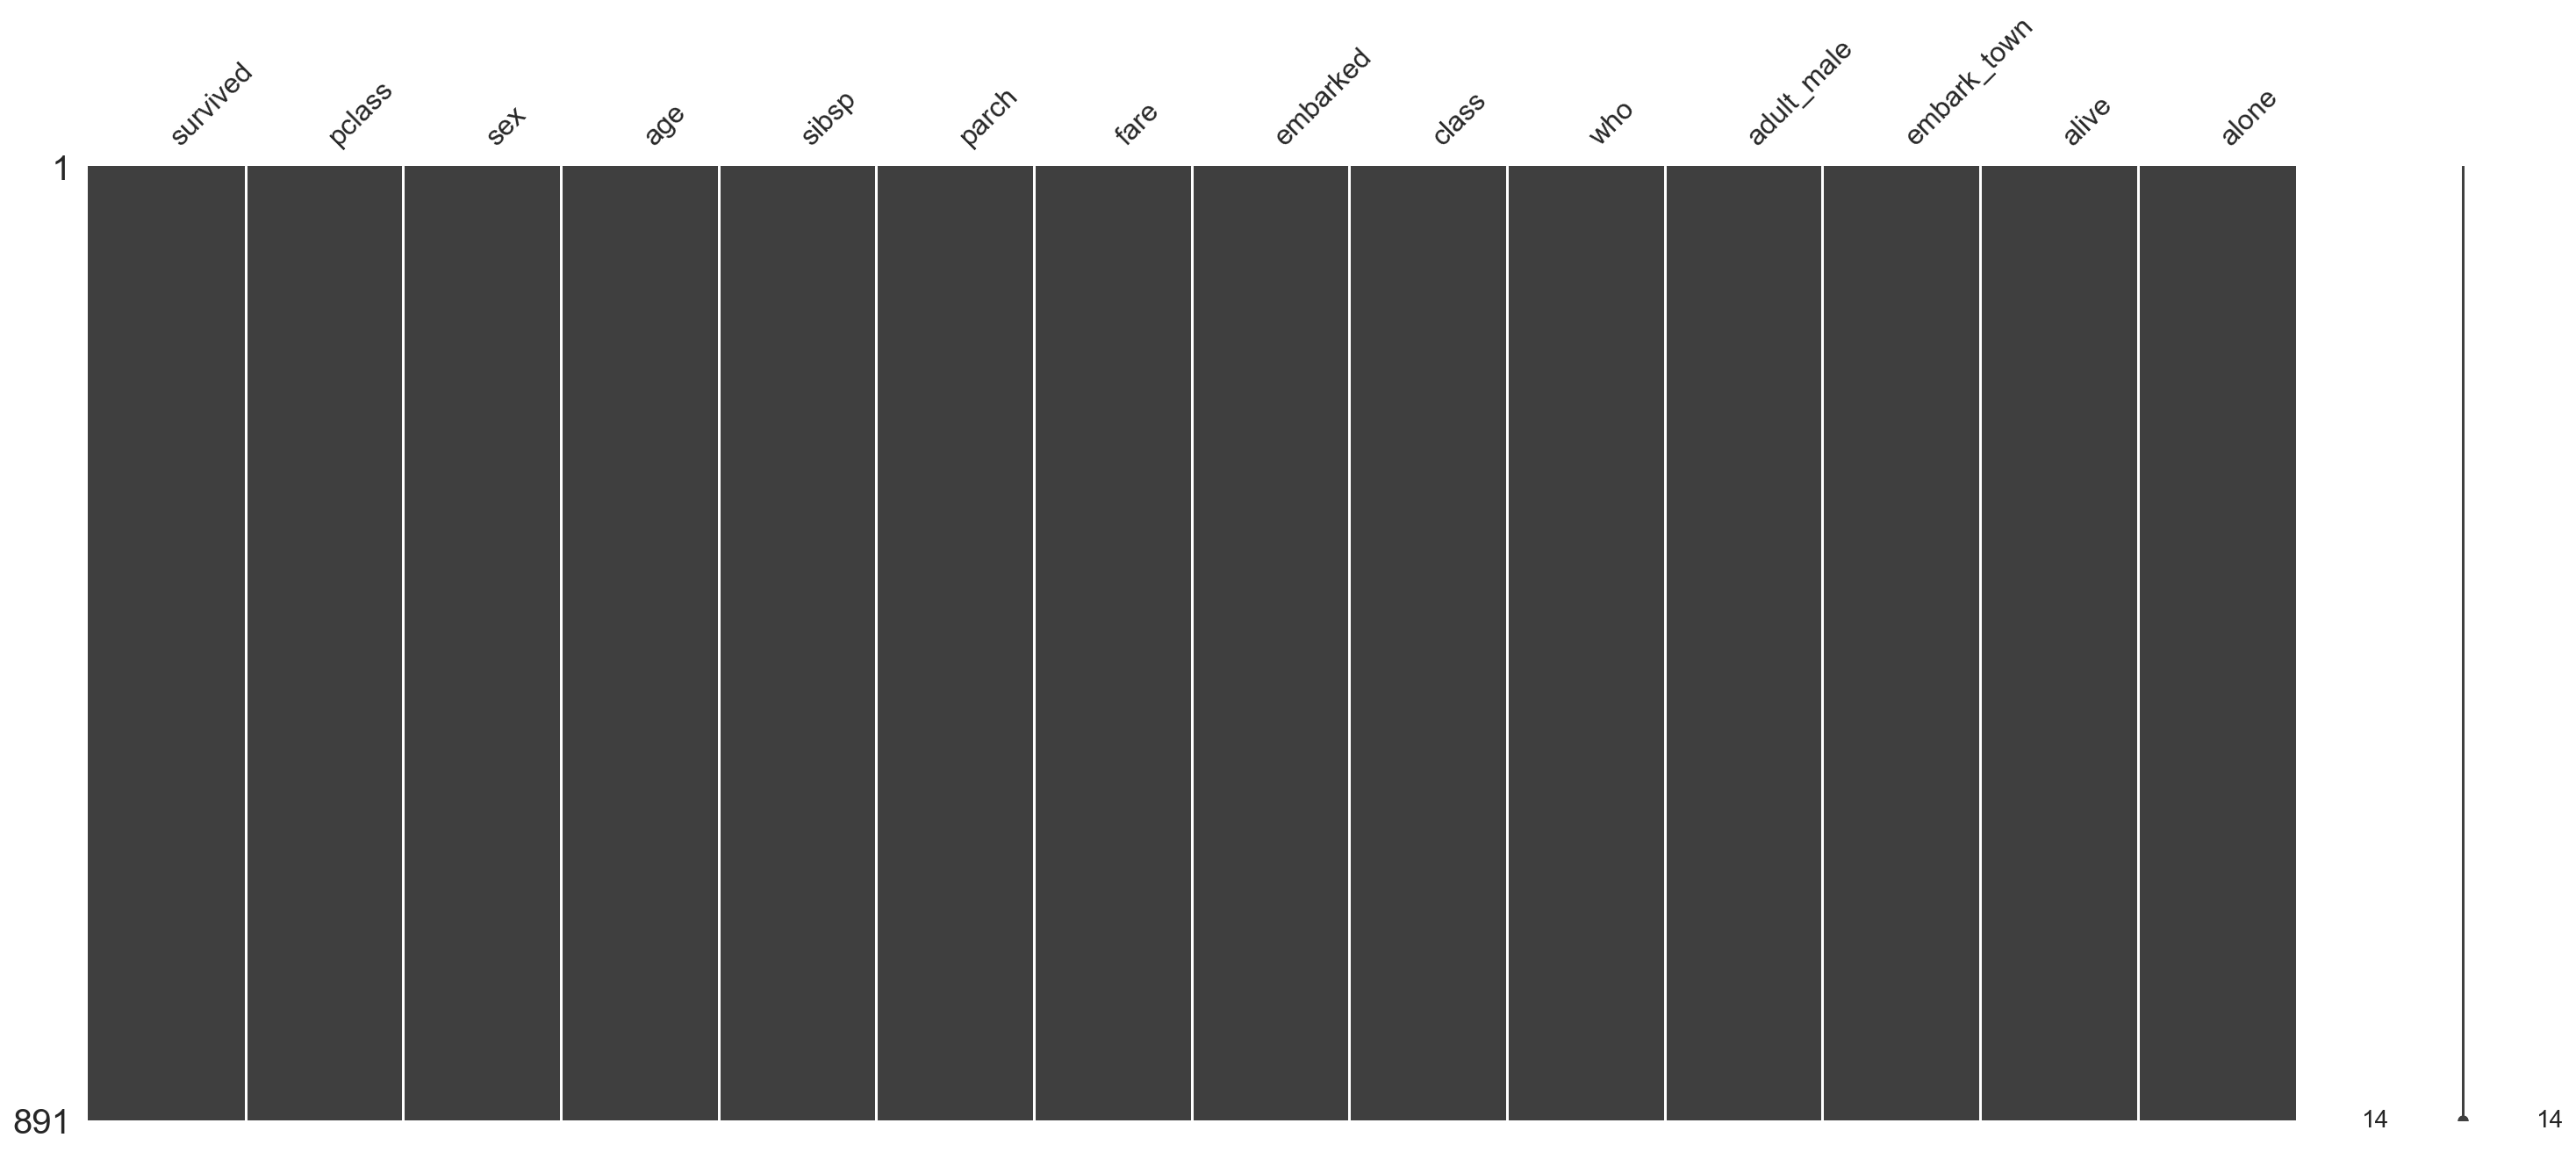

In [24]:
# 결측치가 없음 : 결측치에 대한 전처리 완료
msno.matrix(titanic_df)
plt.show()

### 3. 스케일링, 변환
- StandardScaler
    - 평균 0, 표준편차 1이 되도록 스케일링
    - 아웃라이어가 있으면 스케일링한 데이터가 한쪽으로 쏠림
- RobustScaler
    - 중앙값이 0이 되도록 설정하여 스케일링
    - 아웃라이어가 있어도 데이터가 한쪽으로 쏠리지 않음
    - 표준편차가 1로 스케일링되는것은 아님

In [25]:
data1 = np.arange(7).reshape(-1, 1)
data1

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [26]:
np.mean(data1), np.std(data1)

(3.0, 2.0)

StandardScaler
- 평균 0, 표준편차 1로 스케일링

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data2 = scaler.fit_transform(data1)
data2

array([[-1.5],
       [-1. ],
       [-0.5],
       [ 0. ],
       [ 0.5],
       [ 1. ],
       [ 1.5]])

In [28]:
# 평균, 표준편차
np.mean(data2), np.std(data2)

(0.0, 1.0)

아웃라이어가 존재하는 데이터셋 스케일링

In [29]:
data3 = np.vstack([data1, [[1000]]])
data3

array([[   0],
       [   1],
       [   2],
       [   3],
       [   4],
       [   5],
       [   6],
       [1000]])

데이터가 0으로 모이지 않고 한쪽으로 쏠리게 됩니다.

In [30]:
data = scaler.fit_transform(data3)
data

array([[-0.38705669],
       [-0.38402392],
       [-0.38099115],
       [-0.37795839],
       [-0.37492562],
       [-0.37189286],
       [-0.36886009],
       [ 2.64570872]])

RobustScaler
- 평균값이 아니라 중앙값 0이 되도록 변환하면 아웃라이어가 있어도 대부분의 데이터는 0 주위에 생성됩니다.

In [31]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
data = scaler.fit_transform(data3)
data

array([[-1.00000000e+00],
       [-7.14285714e-01],
       [-4.28571429e-01],
       [-1.42857143e-01],
       [ 1.42857143e-01],
       [ 4.28571429e-01],
       [ 7.14285714e-01],
       [ 2.84714286e+02]])

In [32]:
# 중앙값
np.median(data)

0.0

데이터 변환은 비선형 회귀분석에서 원하는 목표값을 더 잘 예측하기 위한 새로운 데이터를 만들 때 사용된다. 예를 들어 '360도'와 같은 각도 데이터는 그 자체로 예측문제의 입력값으로 넣을 수 없다. 0도와 360도, 10도와 370도는 사실 같은 각도지만 다른 숫자로 표현되기 때문이다. 이 때는 각도 $\theta$를 다음과 같이 삼각함수값의 쌍으로 바꾸면 같은 각도를 같은 숫자쌍으로 표현할 수 있다.

$$ \theta \;\; \rightarrow \;\; (\sin\theta, \cos\theta) $$

다음 예제 코드에서 원래 데이터 `X`는 각도 표시로 되어 있다. 

In [33]:
data4 = 90 * np.arange(9).reshape(-1, 1) 
data4

array([[  0],
       [ 90],
       [180],
       [270],
       [360],
       [450],
       [540],
       [630],
       [720]])

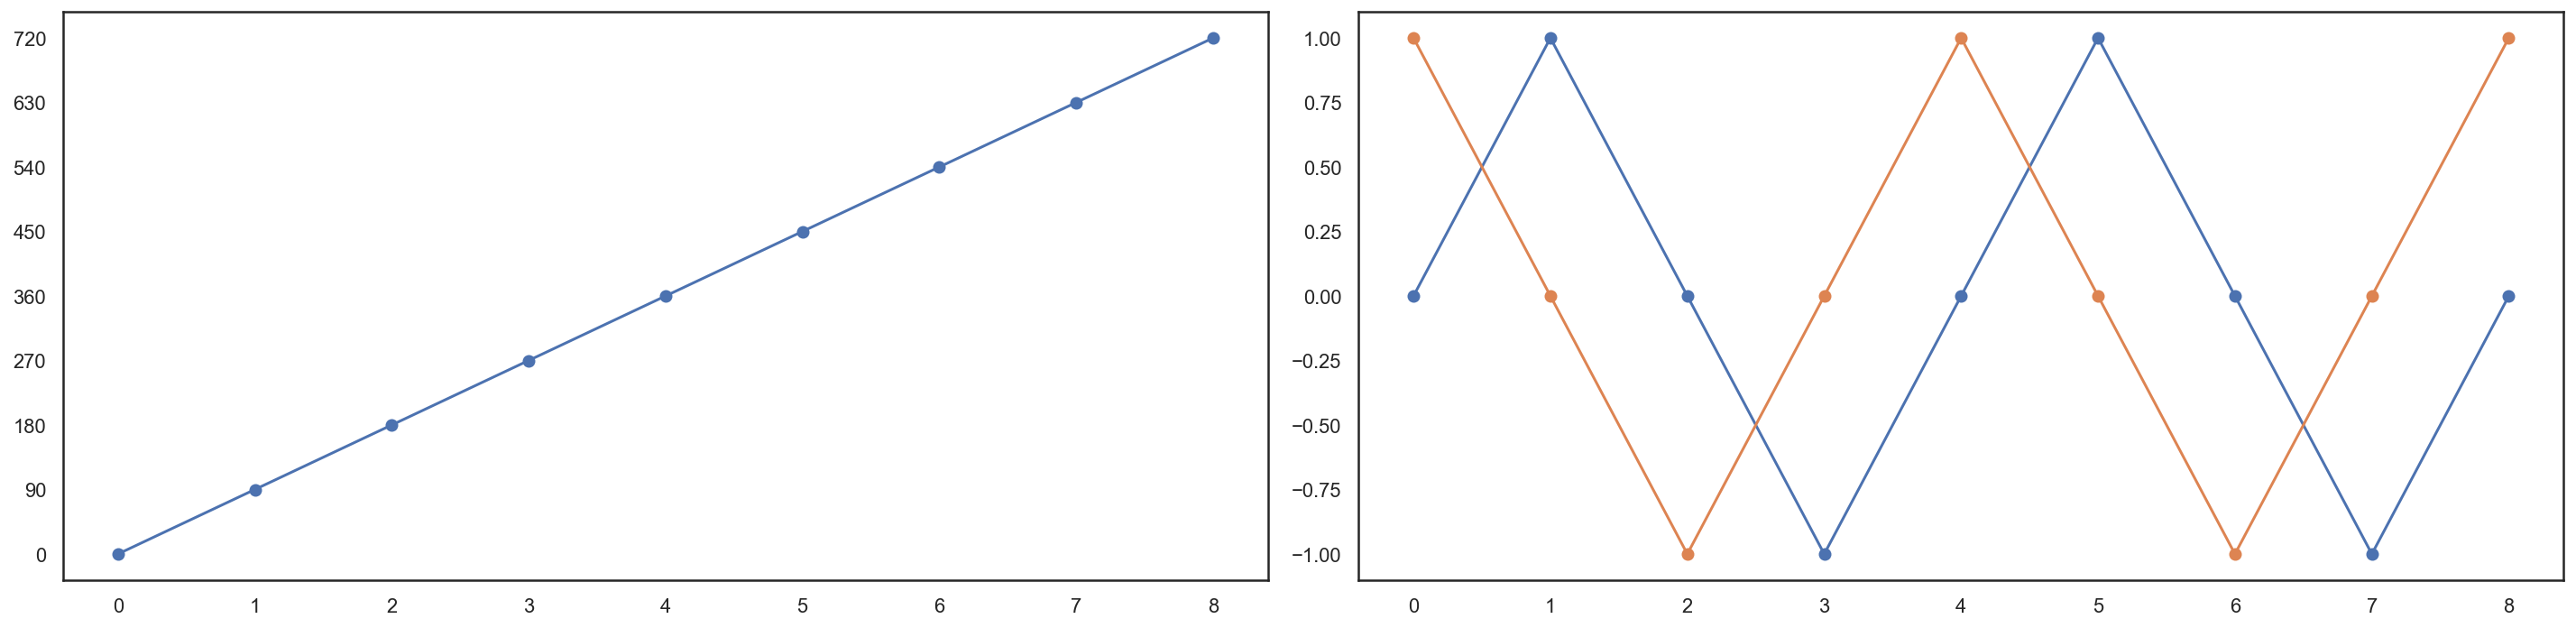

In [34]:
from sklearn.preprocessing import FunctionTransformer

# 𝜃값을 sin 𝜃, cos 𝜃 값(-1 ~ 1)으로 변환
def degree2sincos(data):
    x0 = np.sin(data * np.pi / 180)
    x1 = np.cos(data * np.pi / 180)
    X_new = np.hstack([x0, x1])
    return X_new

# data4를 degree2sincos 함수를 적용해서 정규화
data5 = FunctionTransformer(degree2sincos).fit_transform(data4)

plt.figure(figsize=(20, 5))
plt.subplot(121)
plt.plot(data4, marker="o")
plt.yticks(data4.flatten())
plt.subplot(122)
plt.plot(data5, marker="o")
plt.tight_layout()
plt.show()

### 3. 범주형 데이터의 처리
- 범주형 데이터 : 카테고리를 표현하는 데이터
    - 성별 : 남, 여
    - 혈액형 : A, B, O, AB
    - 학점 : A, B, C, D, F
    - 주소 : 서울, 인천, 대전, 부산, ...
    - 반 : 1반, 2반, 3반, ...
- 데이터 모델링에 사용되는 데이터는 숫자형태의 데이터만 입력을 받을수 있습니다.
- 범주형 데이터는 숫자형태로 변환해서 모델에 사용해야 합니다.
- 범주형 테이터 변환하는 방법
    - 더미 변수화
    - 카테고리 임베딩

#### 3.1 더미 변수화 
- 0과 1만 가지는 카테고리 컬럼으로 표현합니다.
- 한개의 카테고리
    - full-rank 방식
        - 모든 카테고리를 컬럼으로 설정하여 수치화
    - reducec-rank 방식
        - 하나의 카테고리를 기준으로 나머지 컬럼을 수치화
- 두개 이상의 카테고리
    - 통합축소형 방식
        - 카테고리 데이터가 관계가 없는 경우 사용
    - 상호작용 방식
        - 카테고리 데이터가 관계가 있는 경우 사용

Full Rank 방식

In [35]:
datas = np.random.choice(["A", "B", "O", "AB"], 10)
df = pd.DataFrame({"혈액형": datas})
df.tail()

,혈액형
5,AB
6,A
7,AB
8,A
9,AB


In [36]:
dummies_df = pd.get_dummies(df).tail()
dummies_df

,혈액형_A,혈액형_AB,혈액형_B,혈액형_O
5,0,1,0,0
6,1,0,0,0
7,0,1,0,0
8,1,0,0,0
9,0,1,0,0


Reducec Rank 방식
- 특정 컬럼을 기준으로 사용해서 더미 변수화를 합니다.

In [37]:
# 혈액형_A 기준
dummies_df["혈액형_A"]  = 1
dummies_df

,혈액형_A,혈액형_AB,혈액형_B,혈액형_O
5,1,1,0,0
6,1,0,0,0
7,1,1,0,0
8,1,0,0,0
9,1,1,0,0


두개이상의 범주형 변수에 대한 더미 변수화
- 통합축소형 방식
- 상호작용 방식

In [38]:
datas_1 = np.random.choice(["A", "B", "O", "AB"], 100)
datas_2 = np.random.choice(["male", "female"], 100)
df = pd.DataFrame({"혈액형": datas_1, "성별": datas_2})
df.tail(3)

,혈액형,성별
97,B,male
98,O,female
99,B,male


In [39]:
# 통합축소형 방식
dummies_df = pd.get_dummies(df)
intercept = pd.DataFrame([1]*100, columns=["intercept"])
result_df = pd.concat([intercept,  dummies_df], axis=1)
result_df.tail(3)

,intercept,혈액형_A,혈액형_AB,혈액형_B,혈액형_O,성별_female,성별_male
97,1,0,0,1,0,0,1
98,1,0,0,0,1,1,0
99,1,0,0,1,0,0,1


In [40]:
# 상호작용 방식
dummies_df = pd.get_dummies(df["혈액형"] + "_" + df["성별"])
dummies_df.tail(3)

,AB_female,AB_male,A_female,A_male,B_female,B_male,O_female,O_male
97,0,0,0,0,0,1,0,0
98,0,0,0,0,0,0,1,0
99,0,0,0,0,0,1,0,0


#### 3.2 카테고리 임베딩
- 카테고리 임베딩 방식은 카테고리 데이터의 특징을 같은 카테고리의 수치형 데이터로 변환하는 방법입니다.
- 예로 주소 카테고리 데이터를 주소에 해당하는 인구 수치형 데이터로 변환할수 있습니다.
- 주소 : 서울, 인천, 대전 -> 인구 : 1000, 200, 100

타이타닉 데이터 로드

In [41]:
import seaborn as sns

titanic = sns.load_dataset("titanic")
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True
